### Making an NN for MNIST Dataset digit identification

In [7]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [9]:
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [10]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = next(iter(train_loader))
samples, labels = examples

print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


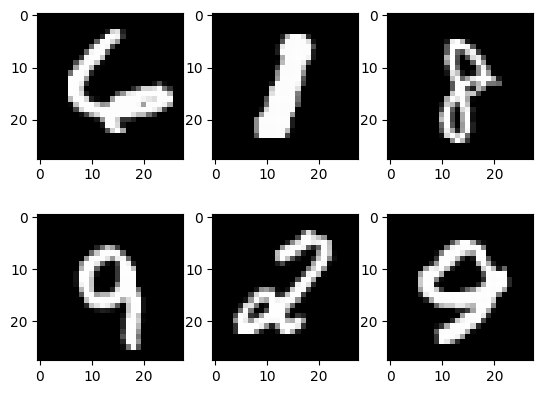

In [11]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [20]:
# Neural Network

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward 
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%100==0:
            print(f'epoch {epoch+1}/{num_epochs}, step{i+1}/{n_total_steps}, loss = {loss.item():.4f}')
# Testing 
# Testing 
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        
        # value, index
        _, predictions = torch.max(outputs, 1)
        
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

# Calculate accuracy after processing all batches
acc = 100.0 * n_correct / n_samples
print(f'Test Accuracy: {acc:.2f}%')

# Set the model back to training mode
# model.train()


epoch 1/2, step100/600, loss = 0.4472
epoch 1/2, step200/600, loss = 0.2006
epoch 1/2, step300/600, loss = 0.3968
epoch 1/2, step400/600, loss = 0.2026
epoch 1/2, step500/600, loss = 0.1250
epoch 1/2, step600/600, loss = 0.2426
epoch 2/2, step100/600, loss = 0.1350
epoch 2/2, step200/600, loss = 0.1449
epoch 2/2, step300/600, loss = 0.2139
epoch 2/2, step400/600, loss = 0.1228
epoch 2/2, step500/600, loss = 0.1224
epoch 2/2, step600/600, loss = 0.2143
Test Accuracy: 95.39%


In [21]:
model.train()

NeuralNet(
  (l1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=100, out_features=10, bias=True)
)